# Classificação de Elementos Transponíveis

Projeto prático da disciplina *SCC0271 - Introdução à Bioinformática*

## Integrantes

* Alexandre E. de Souza - alexandre_souza@usp.br - 12559506
* Eduardo Zaffari Monteiro - eduardozaffarimonteiro@usp.br - 12559490

In [43]:
# Bibliotecas
from Bio import Seq
from Bio import SeqIO
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob

# Construção do Dataset

In [2]:
# Carrega o DataFrame
df_all_files = pd.DataFrame()
for file in glob.glob('dados_gff3/dados_gff3/*.gff3'):
    df_temp = pd.read_csv(file, sep='\t', header=None)
    df_all_files = pd.concat([df_all_files, df_temp])

In [3]:
# Renomeia as Colunas
df_all_files = df_all_files.rename({
    0: 'Chr',
    1: 'Source Annotation',
    2: 'Class_Order_Superfamily',
    3: 'Start',
    4: 'End',
    5: 'Score',
    6: 'Strand',
    7: 'Phase',
    8: 'Attributes'
}, axis=1)

In [6]:
# Separa Class, Order e Superfamily
temp_col = df_all_files['Class_Order_Superfamily'].str.split('/')
df_all_files['Class'] = temp_col.str[0]
df_all_files['Order'] = temp_col.str[1]
df_all_files['SuperFamily'] = temp_col.str[2]
df_all_files = df_all_files.drop('Class_Order_Superfamily', axis=1)

In [7]:
# Filtra as strands positivas
df_filtered = df_all_files[df_all_files['Strand'] == '+']

In [8]:
df_filtered.loc[:, 'Chr'] = df_filtered['Chr'].str.pad(
    width=2, side='left', fillchar='0')

In [31]:
# Seleciona as colunas necessarias e renomeia a coluna target
df_selected = df_filtered[['Chr', 'Start', 'End', 'Class']].rename(
    {'Class': '[Target] Class'}, axis=1)

In [10]:
glob.glob('dados_fasta/dados_fasta/*.fasta')

['dados_fasta/dados_fasta/sequence08.fasta',
 'dados_fasta/dados_fasta/sequenceMT.fasta',
 'dados_fasta/dados_fasta/sequence05.fasta',
 'dados_fasta/dados_fasta/sequence01.fasta',
 'dados_fasta/dados_fasta/sequence10.fasta',
 'dados_fasta/dados_fasta/sequence04.fasta',
 'dados_fasta/dados_fasta/sequencePltd.fasta',
 'dados_fasta/dados_fasta/sequence03.fasta',
 'dados_fasta/dados_fasta/sequence06.fasta',
 'dados_fasta/dados_fasta/sequence07.fasta',
 'dados_fasta/dados_fasta/sequence02.fasta',
 'dados_fasta/dados_fasta/sequence09.fasta']

In [11]:
sequences = {}
for i, fasta_file in enumerate(glob.glob('dados_fasta/dados_fasta/*.fasta'), start=1):
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequences[fasta_file.replace('dados_fasta/dados_fasta/sequence', '').replace(
            '.fasta', '')] = record.seq

In [12]:
sequences

{'08': Seq('AAACCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCC...TAG'),
 'MT': Seq('CTCGAGAATAGATGCGAATAGCAGCTCAGATCAGATCCGAGATGGAGCAGCAAT...AAC'),
 '05': Seq('CTAAACCTAAACATCGACACTAAAGGATTTTAGTGTCGAAACCATGGTAAAATG...TAG'),
 '01': Seq('TCATGGCTATTTTCATAAAAAATGGGGGTTGTGTGGCCATTTATCATCGACTAG...GTT'),
 '10': Seq('TAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAAC...GGG'),
 '04': Seq('CCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAA...TTT'),
 'Pltd': Seq('GAAATACCCAATATCCTGTTGGAACAAGATATTGGGTATTTCCGGCTTTCCTTC...AAA'),
 '03': Seq('CCTAAACCCTAAACCCTAAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTA...TTT'),
 '06': Seq('AAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAAC...AGG'),
 '07': Seq('CTAAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAA...TAG'),
 '02': Seq('TTCTCATTATATCCTTCAACGGCTGCGAAGAAGGAACAATGATATTGTATGCCT...GGT'),
 '09': Seq('GTCGCTCATGGCTATTTTCAAGGTCGCTCATGGCTATTTTCATAAAAAATGGGG...GGT')}

In [32]:
# Filtrando apenas os TEs com cromossomos válidos
chromossomes = list(sequences.keys())

df_selected = df_selected[df_selected['Chr'].isin(chromossomes)]
df_selected

,Chr,Start,End,[Target] Class
0,01,212114101,212114229,Class II subclass 2
2,05,188625114,188625286,Class II subclass 2
3,06,140672383,140672689,Class II subclass 2
4,02,134776255,134776386,Class II subclass 2
6,01,244208330,244208679,Class II subclass 2
...,...,...,...,...
22132,03,192728283,192728389,Class I
22134,01,41167501,41167603,Class I
22135,05,133504000,133504061,Class I
22137,03,12989367,12989472,Class I


In [33]:
# Função que encontra o Elemento Transponível
def find_sequence(row: tuple) -> str:
    start = row['Start']
    end = row['End']
    chr = row['Chr']

    seq = sequences[chr]

    transp_ele = seq[start:end]

    return transp_ele


In [34]:
df_selected['Seq'] = df_selected.apply(find_sequence, axis=1)
df_selected[['Chr', 'Seq', '[Target] Class']]

,Chr,Seq,[Target] Class
0,01,"(A, G, G, A, T, A, C, C, C, C, T, T, C, A, C, ...",Class II subclass 2
2,05,"(C, G, A, T, T, T, T, G, G, T, G, G, T, T, G, ...",Class II subclass 2
3,06,"(C, C, A, C, C, G, G, C, C, C, C, C, T, T, C, ...",Class II subclass 2
4,02,"(A, C, G, G, T, T, T, T, G, A, T, T, G, A, A, ...",Class II subclass 2
6,01,"(A, C, C, C, T, C, T, A, A, C, A, C, T, C, C, ...",Class II subclass 2
...,...,...,...
22132,03,"(C, A, T, A, G, T, G, C, A, T, A, T, T, T, C, ...",Class I
22134,01,"(C, C, A, G, T, T, T, G, T, A, G, A, G, C, A, ...",Class I
22135,05,"(T, T, T, T, T, A, A, G, G, C, A, A, T, A, A, ...",Class I
22137,03,"(C, T, T, A, G, C, C, C, G, A, G, T, C, C, G, ...",Class I


In [16]:
# Substituindo classes por códigos
classes = {'Class I': 0,
           'Class II subclass I': 1,
           'Class II subclass 1': 2,
           'Class II subclass 2': 3}

In [ ]:
df_aux = df_selected[['Chr', 'Seq', '[Target] Class']]
df_aux['[Target] Class'] = df_aux['[Target] Class'].map(classes)

/tmp/ipykernel_3774/4283791952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux['[Target] Class'] = df_aux['[Target] Class'].map(classes)


In [35]:
df_aux = df_aux[df_aux['Seq'].str.strip() != '']
df_aux

,Chr,Seq,[Target] Class
41124,05,"(C, A, A, A, A, A, G, A, A, C, A, T, C, A, A, ...",0
225937,09,"(T, C, C, G, C, C, C, T, A, G, G, C, C, G, G, ...",0
18876,04,"(T, T, G, G, C, T, T, G, C, T, C, A, G, G, C, ...",3
228160,08,"(C, C, T, C, G, G, G, G, G, C, T, A, C, A, C, ...",0
105598,09,"(A, A, C, C, T, C, G, G, G, A, G, C, A, A, G, ...",2
...,...,...,...
16670,04,"(T, C, C, A, C, T, T, T, G, A, A, C, T, A, T, ...",3
61054,10,"(T, T, T, A, G, C, A, A, C, A, T, T, T, T, T, ...",0
101282,04,"(T, T, G, G, C, A, T, C, G, T, C, C, A, A, A, ...",0
264214,05,"(C, C, G, T, A, C, A, A, T, A, T, T, A, T, A, ...",0


In [36]:
with open('sequences.fasta', 'w') as fasta_file:
    for index, row in df_aux.iterrows():
        fasta_file.write(f">chr|{row['Chr']}|class|{row['[Target] Class']}|\n{row['Seq']}\n")

# Leitura do Dataset

In [49]:
# Lendo o dataset do arquivo csv
dataset = pd.read_csv('dataset.csv')
dataset

,nameseq,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,...,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
0,chr|05|class|0|,17858.0,11383.472686,81775546.0,147.712532,0.333333,29.285927,611940.289138,611957.423363,5542.631305,...,11383.472686,17169.126634,8.177540e+07,3.744919e+11,9960.265521,4980.132760,34.267011,0.031741,0.262307,TE
1,chr|09|class|0|,412.0,246.106847,45866.0,26.606489,0.333333,4.366813,2249.895553,2252.630989,134.468533,...,246.106847,395.811586,4.583939e+04,5.074346e+06,233.561823,116.780912,5.460912,0.221201,0.246461,TE
2,chr|04|class|3|,18533.0,12144.603828,86908177.0,315.504222,0.333333,29.604027,638334.261230,638351.483485,5918.862739,...,12144.603828,18095.564384,8.690786e+07,4.074926e+11,10430.422376,5215.211188,34.443116,0.030024,0.261457,TE
3,chr|08|class|0|,80.0,46.018077,1812.0,11.094314,0.333333,1.918536,199.333891,200.591530,21.421319,...,46.018077,84.499099,1.800906e+03,4.023696e+04,55.799264,27.899632,2.491674,0.511432,0.294945,TE
4,chr|09|class|2|,200.0,130.095076,10322.0,12.000000,0.333333,2.974564,724.064914,725.881893,59.739385,...,130.095076,181.318799,1.031000e+04,5.269045e+05,100.599818,50.299909,3.620325,0.289635,0.208316,TE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169100,chr|04|class|3|,18641.0,12193.900510,87946055.0,361.647575,0.333333,29.766224,644095.175171,644112.452170,5847.230575,...,12193.900510,18028.629009,8.794569e+07,4.148809e+11,10344.892291,5172.446145,34.552609,0.030029,0.259460,TE
169101,chr|10|class|0|,12587.0,8141.482453,40899383.0,298.702850,0.333333,24.547688,364512.983835,364527.464438,3946.789309,...,8141.482453,12036.256247,4.089908e+07,1.328803e+11,6909.270012,3454.635006,28.959481,0.036587,0.260104,TE
169102,chr|04|class|0|,408.0,276.568813,43210.0,45.382880,0.333333,4.286144,2128.343957,2130.957026,134.426877,...,276.568813,392.504656,4.316462e+04,4.540978e+06,218.852793,109.426396,5.216529,0.185258,0.268283,TE
169103,chr|05|class|0|,394.0,244.664221,44062.0,16.896788,0.333333,4.337669,2210.694009,2213.504810,106.577413,...,244.664221,358.765585,4.404510e+04,4.899604e+06,211.159623,105.579812,5.610898,0.202655,0.245691,TE


In [50]:
# Funções auxiliares para extrair informações das sequências
get_chr = lambda row: row['nameseq'][4:6] 
get_class = lambda row: row['nameseq'][-2:-1]

In [51]:
# Criando novas colunas
dataset['chr'] = dataset.apply(get_chr, axis=1)
dataset['class'] = dataset.apply(get_class, axis=1)

# Formatando as colunas
dataset = dataset.drop('label', axis=1)
dataset = dataset.drop('nameseq', axis=1)

dataset

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,...,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,chr,class
0,17858.0,11383.472686,81775546.0,147.712532,0.333333,29.285927,611940.289138,611957.423363,5542.631305,7208.861114,...,17169.126634,8.177540e+07,3.744919e+11,9960.265521,4980.132760,34.267011,0.031741,0.262307,05,0
1,412.0,246.106847,45866.0,26.606489,0.333333,4.366813,2249.895553,2252.630989,134.468533,162.249763,...,395.811586,4.583939e+04,5.074346e+06,233.561823,116.780912,5.460912,0.221201,0.246461,09,0
2,18533.0,12144.603828,86908177.0,315.504222,0.333333,29.604027,638334.261230,638351.483485,5918.862739,7665.142008,...,18095.564384,8.690786e+07,4.074926e+11,10430.422376,5215.211188,34.443116,0.030024,0.261457,04,3
3,80.0,46.018077,1812.0,11.094314,0.333333,1.918536,199.333891,200.591530,21.421319,28.699836,...,84.499099,1.800906e+03,4.023696e+04,55.799264,27.899632,2.491674,0.511432,0.294945,08,0
4,200.0,130.095076,10322.0,12.000000,0.333333,2.974564,724.064914,725.881893,59.739385,80.718981,...,181.318799,1.031000e+04,5.269045e+05,100.599818,50.299909,3.620325,0.289635,0.208316,09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169100,18641.0,12193.900510,87946055.0,361.647575,0.333333,29.766224,644095.175171,644112.452170,5847.230575,7683.736719,...,18028.629009,8.794569e+07,4.148809e+11,10344.892291,5172.446145,34.552609,0.030029,0.259460,04,3
169101,12587.0,8141.482453,40899383.0,298.702850,0.333333,24.547688,364512.983835,364527.464438,3946.789309,5126.986235,...,12036.256247,4.089908e+07,1.328803e+11,6909.270012,3454.635006,28.959481,0.036587,0.260104,10,0
169102,408.0,276.568813,43210.0,45.382880,0.333333,4.286144,2128.343957,2130.957026,134.426877,173.651863,...,392.504656,4.316462e+04,4.540978e+06,218.852793,109.426396,5.216529,0.185258,0.268283,04,0
169103,394.0,244.664221,44062.0,16.896788,0.333333,4.337669,2210.694009,2213.504810,106.577413,147.605962,...,358.765585,4.404510e+04,4.899604e+06,211.159623,105.579812,5.610898,0.202655,0.245691,05,0


# Pré-processamento

A matriz de correlação abaixo irá guiar a etapa de pré-processamento

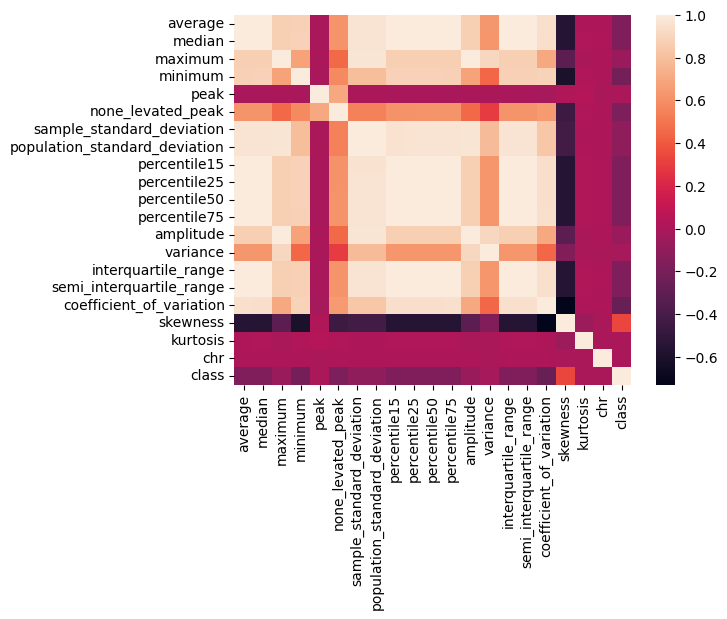

In [27]:
# Criando a Matriz de Correlação
corr_matrix = dataset.corr()

# Gerando e exibindo o heatmap
sns.heatmap(corr_matrix)
plt.show()

## Tratamento de missings

In [60]:
dataset.drop(['class', 'chr'], axis=1)

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis
0,17858.0,11383.472686,81775546.0,147.712532,0.333333,29.285927,611940.289138,611957.423363,5542.631305,7208.861114,11383.472686,17169.126634,8.177540e+07,3.744919e+11,9960.265521,4980.132760,34.267011,0.031741,0.262307
1,412.0,246.106847,45866.0,26.606489,0.333333,4.366813,2249.895553,2252.630989,134.468533,162.249763,246.106847,395.811586,4.583939e+04,5.074346e+06,233.561823,116.780912,5.460912,0.221201,0.246461
2,18533.0,12144.603828,86908177.0,315.504222,0.333333,29.604027,638334.261230,638351.483485,5918.862739,7665.142008,12144.603828,18095.564384,8.690786e+07,4.074926e+11,10430.422376,5215.211188,34.443116,0.030024,0.261457
3,80.0,46.018077,1812.0,11.094314,0.333333,1.918536,199.333891,200.591530,21.421319,28.699836,46.018077,84.499099,1.800906e+03,4.023696e+04,55.799264,27.899632,2.491674,0.511432,0.294945
4,200.0,130.095076,10322.0,12.000000,0.333333,2.974564,724.064914,725.881893,59.739385,80.718981,130.095076,181.318799,1.031000e+04,5.269045e+05,100.599818,50.299909,3.620325,0.289635,0.208316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169100,18641.0,12193.900510,87946055.0,361.647575,0.333333,29.766224,644095.175171,644112.452170,5847.230575,7683.736719,12193.900510,18028.629009,8.794569e+07,4.148809e+11,10344.892291,5172.446145,34.552609,0.030029,0.259460
169101,12587.0,8141.482453,40899383.0,298.702850,0.333333,24.547688,364512.983835,364527.464438,3946.789309,5126.986235,8141.482453,12036.256247,4.089908e+07,1.328803e+11,6909.270012,3454.635006,28.959481,0.036587,0.260104
169102,408.0,276.568813,43210.0,45.382880,0.333333,4.286144,2128.343957,2130.957026,134.426877,173.651863,276.568813,392.504656,4.316462e+04,4.540978e+06,218.852793,109.426396,5.216529,0.185258,0.268283
169103,394.0,244.664221,44062.0,16.896788,0.333333,4.337669,2210.694009,2213.504810,106.577413,147.605962,244.664221,358.765585,4.404510e+04,4.899604e+06,211.159623,105.579812,5.610898,0.202655,0.245691


In [61]:
# Substitua valores infinitos por NaN 
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separando a base em variáveis explicativas e target
X = dataset.drop(['class', 'chr'], axis=1)
y = dataset['class']

# Como as variáveis que possuem valores faltantes tem uma leve correlação com a target, seus valores Nan serão imputados
X = X.fillna(X.median())

X

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis
0,17858.0,11383.472686,81775546.0,147.712532,0.333333,29.285927,611940.289138,611957.423363,5542.631305,7208.861114,11383.472686,17169.126634,8.177540e+07,3.744919e+11,9960.265521,4980.132760,34.267011,0.031741,0.262307
1,412.0,246.106847,45866.0,26.606489,0.333333,4.366813,2249.895553,2252.630989,134.468533,162.249763,246.106847,395.811586,4.583939e+04,5.074346e+06,233.561823,116.780912,5.460912,0.221201,0.246461
2,18533.0,12144.603828,86908177.0,315.504222,0.333333,29.604027,638334.261230,638351.483485,5918.862739,7665.142008,12144.603828,18095.564384,8.690786e+07,4.074926e+11,10430.422376,5215.211188,34.443116,0.030024,0.261457
3,80.0,46.018077,1812.0,11.094314,0.333333,1.918536,199.333891,200.591530,21.421319,28.699836,46.018077,84.499099,1.800906e+03,4.023696e+04,55.799264,27.899632,2.491674,0.511432,0.294945
4,200.0,130.095076,10322.0,12.000000,0.333333,2.974564,724.064914,725.881893,59.739385,80.718981,130.095076,181.318799,1.031000e+04,5.269045e+05,100.599818,50.299909,3.620325,0.289635,0.208316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169100,18641.0,12193.900510,87946055.0,361.647575,0.333333,29.766224,644095.175171,644112.452170,5847.230575,7683.736719,12193.900510,18028.629009,8.794569e+07,4.148809e+11,10344.892291,5172.446145,34.552609,0.030029,0.259460
169101,12587.0,8141.482453,40899383.0,298.702850,0.333333,24.547688,364512.983835,364527.464438,3946.789309,5126.986235,8141.482453,12036.256247,4.089908e+07,1.328803e+11,6909.270012,3454.635006,28.959481,0.036587,0.260104
169102,408.0,276.568813,43210.0,45.382880,0.333333,4.286144,2128.343957,2130.957026,134.426877,173.651863,276.568813,392.504656,4.316462e+04,4.540978e+06,218.852793,109.426396,5.216529,0.185258,0.268283
169103,394.0,244.664221,44062.0,16.896788,0.333333,4.337669,2210.694009,2213.504810,106.577413,147.605962,244.664221,358.765585,4.404510e+04,4.899604e+06,211.159623,105.579812,5.610898,0.202655,0.245691


## Normalização

In [62]:
# Normalizando as variáveis a partir da média
X_normalized = (X - X.mean())/X.std()
X_normalized

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis
0,2.081618,2.064173,1.236066,0.450445,-0.015614,1.364637,1.744087,1.744100,2.042123,2.037553,2.064173,2.100649,1.236067,0.429860,2.146202,2.146202,2.119537,-1.105459,0.258325
1,-0.500364,-0.503251,-0.281795,-0.511765,-0.015614,-0.381048,-0.384097,-0.384101,-0.496147,-0.500971,-0.503251,-0.499606,-0.281794,-0.145454,-0.498086,-0.498086,-0.551702,0.134011,-0.324410
2,2.181517,2.239632,1.331388,1.783582,-0.015614,1.386921,1.836218,1.836229,2.218703,2.201927,2.239632,2.244269,1.331386,0.480558,2.274018,2.274018,2.135868,-1.116693,0.227085
3,-0.549500,-0.549377,-0.282613,-0.635013,-0.015614,-0.552559,-0.391255,-0.391264,-0.549204,-0.549082,-0.549377,-0.547867,-0.282612,-0.145462,-0.546412,-0.546412,-0.827044,2.032735,1.458569
4,-0.531740,-0.529995,-0.282455,-0.627817,-0.015614,-0.478580,-0.389423,-0.389431,-0.531220,-0.530342,-0.529995,-0.532858,-0.282454,-0.145461,-0.534232,-0.534232,-0.722383,0.581715,-1.727186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169100,2.197501,2.250996,1.350663,2.150200,-0.015614,1.398283,1.856327,1.856338,2.185083,2.208626,2.250996,2.233892,1.350661,0.491908,2.250766,2.250766,2.146021,-1.116661,0.153623
169101,1.301518,1.316818,0.476925,1.650092,-0.015614,1.032704,0.880418,0.880435,1.293129,1.287563,1.316818,1.304935,0.476922,0.058679,1.316763,1.316763,1.627361,-1.073753,0.177312
169102,-0.500956,-0.496229,-0.281844,-0.362583,-0.015614,-0.386699,-0.384521,-0.384526,-0.496166,-0.496864,-0.496229,-0.500119,-0.281844,-0.145455,-0.502084,-0.502084,-0.574364,-0.101130,0.478092
169103,-0.503028,-0.503584,-0.281828,-0.588911,-0.015614,-0.383089,-0.384234,-0.384238,-0.509237,-0.506247,-0.503584,-0.505349,-0.281827,-0.145454,-0.504176,-0.504176,-0.537793,0.012678,-0.352726


## *Feature Selection*

Para a seleção de variáveis, será usado um estimador de Ridge Regression. Os coeficientes do estimador representam a importância de cada uma das variáveis, e aquelas com os maiores coeficientes serão selecionadas.

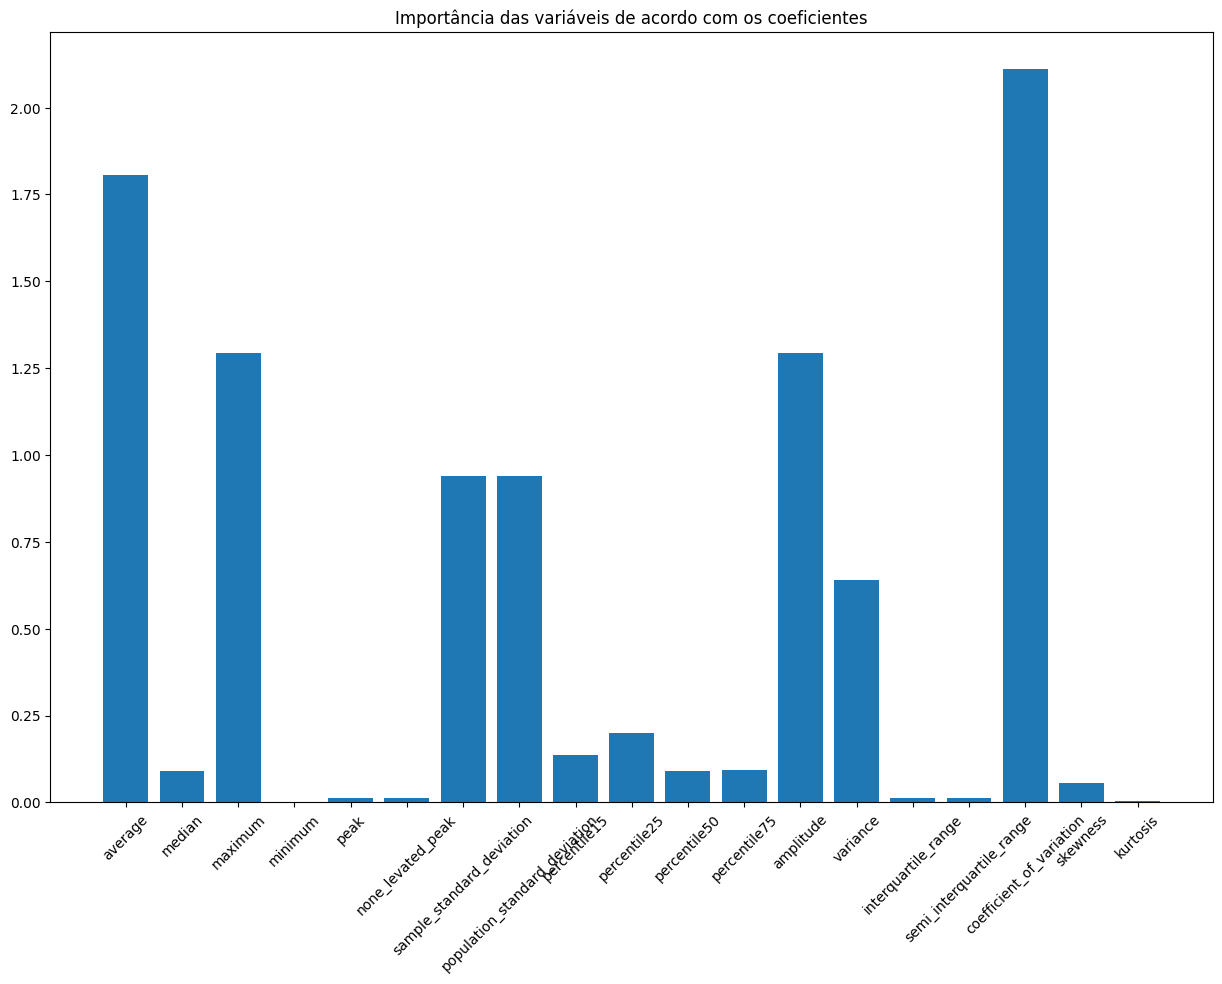

In [73]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_normalized, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)

plt.figure(figsize=(15, 10))
plt.bar(height=importance, x=feature_names)
plt.title("Importância das variáveis de acordo com os coeficientes")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Selecionando as 6 variáveis com os maiores coeficientes
threshold = np.sort(importance)[-7] + 0.01

sfm = SelectFromModel(ridge, threshold=threshold).fit(X_normalized, y)

print(f"Variáveis selecionadas pelo SelectFromModel: {feature_names[sfm.get_support()]}")

Features selected by SelectFromModel: ['average' 'maximum' 'sample_standard_deviation'
 'population_standard_deviation' 'amplitude' 'coefficient_of_variation']


In [78]:
# Dataset final
X_normalized = X_normalized[['average', 'maximum', 'sample_standard_deviation',
 'population_standard_deviation', 'amplitude', 'coefficient_of_variation']]
X_normalized

,average,maximum,sample_standard_deviation,population_standard_deviation,amplitude,coefficient_of_variation
0,2.081618,1.236066,1.744087,1.744100,1.236067,2.119537
1,-0.500364,-0.281795,-0.384097,-0.384101,-0.281794,-0.551702
2,2.181517,1.331388,1.836218,1.836229,1.331386,2.135868
3,-0.549500,-0.282613,-0.391255,-0.391264,-0.282612,-0.827044
4,-0.531740,-0.282455,-0.389423,-0.389431,-0.282454,-0.722383
...,...,...,...,...,...,...
169100,2.197501,1.350663,1.856327,1.856338,1.350661,2.146021
169101,1.301518,0.476925,0.880418,0.880435,0.476922,1.627361
169102,-0.500956,-0.281844,-0.384521,-0.384526,-0.281844,-0.574364
169103,-0.503028,-0.281828,-0.384234,-0.384238,-0.281827,-0.537793


## Separando o Dataset

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [86]:
X_train.head(5)

,average,maximum,sample_standard_deviation,population_standard_deviation,amplitude,coefficient_of_variation
68719,-0.545208,-0.282587,-0.390889,-0.390898,-0.282585,-0.799440
1318,-0.546688,-0.282598,-0.391044,-0.391053,-0.282597,-0.814748
138115,-0.541804,-0.282562,-0.390581,-0.390590,-0.282561,-0.782493
81106,-0.486748,-0.281407,-0.381605,-0.381608,-0.281407,-0.512761
140371,-0.459812,-0.280442,-0.376164,-0.376166,-0.280441,-0.446737


In [88]:
X_train.shape

(118373, 6)

In [89]:
X_test.head(5)

,average,maximum,sample_standard_deviation,population_standard_deviation,amplitude,coefficient_of_variation
6098,4.795911,5.883641,5.699576,5.699551,5.883645,3.412541
137349,-0.512796,-0.281994,-0.385213,-0.385217,-0.281993,-0.512432
92996,0.054186,-0.202006,-0.156988,-0.156977,-0.202008,0.442753
156388,-0.340082,-0.272076,-0.340597,-0.340594,-0.272076,-0.145549
8815,-0.381965,-0.275239,-0.352015,-0.352013,-0.275239,-0.182744


In [90]:
X_test.shape

(50732, 6)

In [93]:
print(y_train.shape, y_test.shape, sep='\n')

(118373,)
(50732,)


# Modelagem